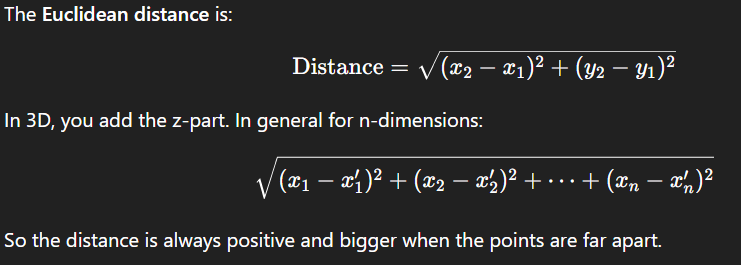

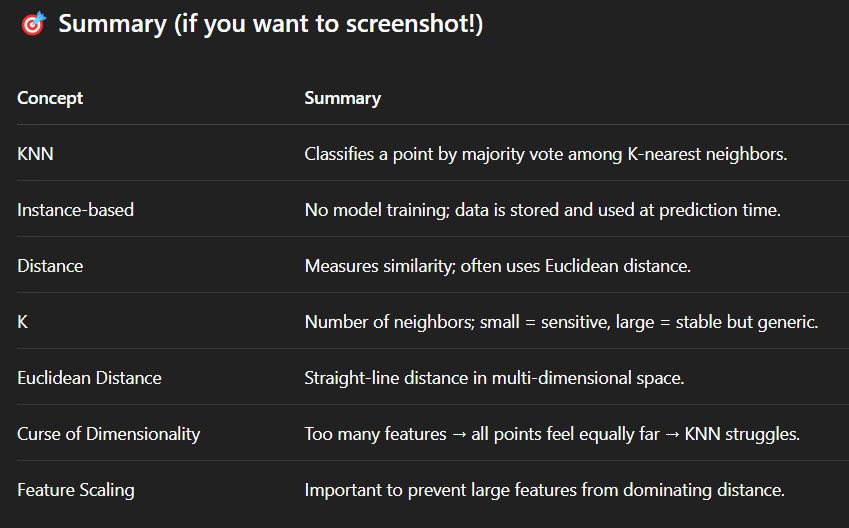

K=3 → Accuracy: 0.7343
K=5 → Accuracy: 0.7832
K=7 → Accuracy: 0.7762
K=9 → Accuracy: 0.7552


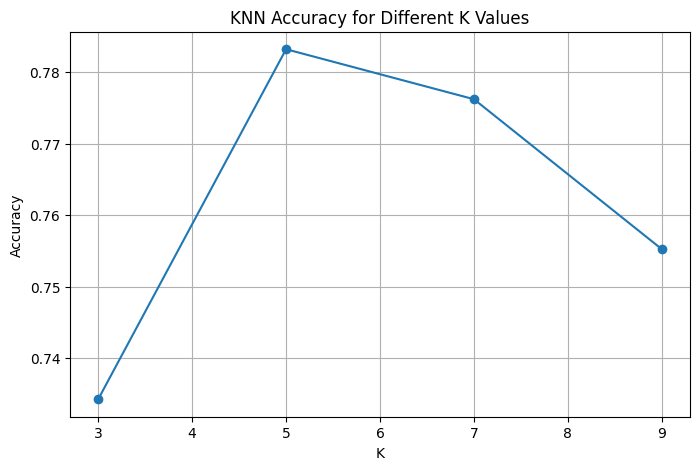

Best K: 5


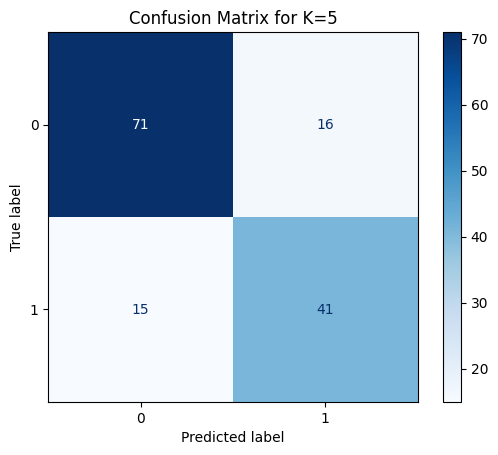

In [3]:
## hands-on KNN practice using the Titanic dataset, step by step. 

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select useful features and drop rows with missing values
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]
df = df.dropna()

# Convert categorical to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

#  Train KNeighborsClassifier() for different K values
k_values = [3, 5, 7, 9]
accuracies = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"K={k} → Accuracy: {acc:.4f}")

# Plotting the accuracies
plt.figure(figsize=(8,5))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Find the best K
best_k = max(accuracies, key=accuracies.get)
print(f"Best K: {best_k}")

# Train and predict using best K
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()
